In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [2]:
CAD_data=pd.read_csv("CAD.csv")

In [3]:
CAD_data

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,Male,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,N,Cad
299,55,64,152,Fmale,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,mild,Normal
300,48,77,160,Fmale,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,N,Normal
301,57,90,159,Fmale,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,N,Normal


In [4]:
CAD_data.shape

(303, 55)

In [5]:
CAD_data["Cath"].value_counts()

Cad       216
Normal     87
Name: Cath, dtype: int64

In [6]:
CAD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [7]:
CAD_data.describe()

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,...,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,...,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,...,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,...,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,...,90.000000,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000


In [8]:
CAD_data.isnull().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
F

In [9]:
CAD_data=CAD_data.dropna()
CAD_data

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,Male,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,N,Cad
299,55,64,152,Fmale,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,mild,Normal
300,48,77,160,Fmale,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,N,Normal
301,57,90,159,Fmale,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,N,Normal


In [10]:
CAD_data.replace({'Sex':{'Fmale':0,'Male':1}
                ,'Obesity':{'N':0,'Y':1}
                ,'CRF':{'N':0,'Y':1}
               ,'CVA':{'N':0,'Y':1}
               ,'Airway disease':{'N':0,'Y':1}
               ,'Thyroid Disease':{'N':0,'Y':1}
               ,'CHF':{'N':0,'Y':1}
               ,'DLP':{'N':0,'Y':1}
               ,'Weak Peripheral Pulse':{'N':0,'Y':1}
               ,'Lung rales':{'N':0,'Y':1}
                 ,'Systolic Murmur':{'N':0,'Y':1}
                 ,'Diastolic Murmur':{'N':0,'Y':1}
                 ,'Dyspnea':{'N':0,'Y':1}
                 ,'Atypical':{'N':0,'Y':1}
                 ,'Nonanginal':{'N':0,'Y':1}
                 ,'LowTH Ang':{'N':0,'Y':1}
                 ,'LVH':{'N':0,'Y':1}
                 ,'Poor R Progression':{'N':0,'Y':1}
                 ,'VHD':{'mild':0,'N':1,'Moderate':2,'Severe':3}
                 ,'Cath':{'Normal':0,'Cad':1}
                 ,'Exertional CP':{'N':0}},inplace=True)

In [11]:
X = CAD_data.drop('Cath', axis=1)
Y = CAD_data.loc[:, 'Cath']

In [12]:
# Feature Importance :
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=9)
ordered_feature=ordered_rank_features.fit(X,Y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank.nlargest(15, 'Score')

,Features,Score
47,WBC,1167.316183
39,TG,381.017191
37,FBS,290.382804
43,ESR,125.493829
0,Age,70.675365
52,Region RWMA,62.344117
17,BP,47.262174
50,PLT,45.376214
24,Typical Chest Pain,40.978986
27,Atypical,36.328101


In [13]:
X = CAD_data.drop(['Cath','Weight','Length','Sex','BMI','HTN','Current Smoker','EX-Smoker','FH','Obesity','CRF','CVA','Airway disease','Thyroid Disease','CHF','DLP','PR','Edema','Weak Peripheral Pulse','Lung rales','Systolic Murmur','Diastolic Murmur','Dyspnea','Function Class','Exertional CP','LowTH Ang','Q Wave','St Elevation','St Depression','LVH','Poor R Progression','CR','LDL','HDL','BUN','HB','K','Na','Neut','VHD'], axis=1)
Y = CAD_data.loc[:, 'Cath']

In [14]:
X

,Age,DM,BP,Typical Chest Pain,Atypical,Nonanginal,Tinversion,FBS,TG,ESR,WBC,Lymph,PLT,EF-TTE,Region RWMA
0,53,0,110,0,0,0,1,90,250,7,5700,39,261,50,0
1,67,0,140,1,0,0,1,80,309,26,7700,38,165,40,4
2,54,0,100,1,0,0,0,85,103,10,7400,38,230,40,2
3,66,0,100,0,0,1,0,78,63,76,13000,18,742,55,0
4,50,0,110,0,0,0,0,104,170,27,9200,55,274,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,0,100,1,0,0,0,92,112,13,8500,34,251,45,0
299,55,0,100,0,1,0,0,86,111,3,11400,16,377,40,0
300,48,0,130,0,0,1,0,83,93,20,9000,35,279,55,0
301,57,1,100,0,1,0,0,96,116,31,3800,48,208,55,0


In [15]:
Y

0      1
1      1
2      1
3      0
4      0
      ..
298    1
299    0
300    0
301    0
302    1
Name: Cath, Length: 303, dtype: int64

In [16]:
scaler=StandardScaler()

In [17]:
scaler.fit(X)

StandardScaler()

In [18]:
X_standardized_data=scaler.transform(X)   

In [19]:
print(X_standardized_data)

[[-0.56844576 -0.65002709 -1.03425361 ...  0.65097677  0.31068636
  -0.54876069]
 [ 0.78093696 -0.65002709  0.55247471 ... -0.93068146 -0.81133948
   2.98899442]
 [-0.47206128 -0.65002709 -1.56316305 ...  0.14023297 -0.81133948
   1.22011686]
 ...
 [-1.05036816 -0.65002709  0.02356527 ...  0.94753769  0.87169929
  -0.54876069]
 [-0.18290784  1.53839743 -1.56316305 ... -0.22223038  0.87169929
  -0.54876069]
 [-0.27929232 -0.65002709 -0.50534417 ...  1.32647664  0.87169929
  -0.54876069]]


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standardized_data, Y, test_size=0.1, random_state=42)

In [21]:
y_train.shape

(272,)

In [22]:
y_test.shape

(31,)

In [23]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError

def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'Predictions: {pred}')
    print('\n')
    print(f'Training Score: {model.score(X_train, y_train)}')
    print('\n')
    print(f'Confusion Matrix:')
    print(f'{confusion_matrix(pred, y_test)}')
    print('\n')
    print("Classification Report:")
    print(classification_report(pred, y_test))
    print('\n')
    print(f'Accuracy Score: {accuracy_score(pred, y_test)}')
    print(f'Mean Squared Error: {mean_squared_error(pred, y_test)}')
    
        # Plot confusion matrix
    classes = ['CAD', 'No CAD']

    lr_cm= ConfusionMatrix(model, classes=classes, cmap='GnBu')

    lr_cm.fit(X_train, y_train)
    lr_cm.score(X_test, y_test)
    plt.show()
    
    print('\n')
    plt.show()

Predictions: [0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


Training Score: 1.0


Confusion Matrix:
[[ 4  0]
 [ 4 23]]


Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       1.00      0.85      0.92        27

    accuracy                           0.87        31
   macro avg       0.75      0.93      0.79        31
weighted avg       0.94      0.87      0.89        31



Accuracy Score: 0.8709677419354839
Mean Squared Error: 0.12903225806451613


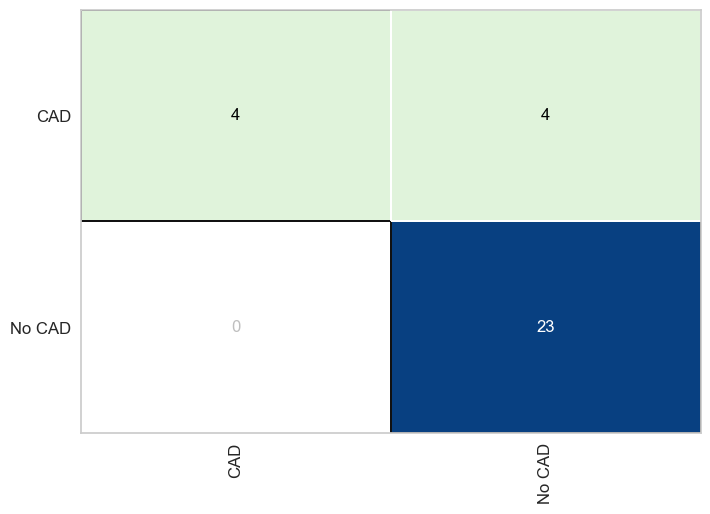

In [24]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)

predict(forest)

Predictions: [0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1]


Training Score: 0.9632352941176471


Confusion Matrix:
[[ 4  0]
 [ 4 23]]


Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       1.00      0.85      0.92        27

    accuracy                           0.87        31
   macro avg       0.75      0.93      0.79        31
weighted avg       0.94      0.87      0.89        31



Accuracy Score: 0.8709677419354839
Mean Squared Error: 0.12903225806451613


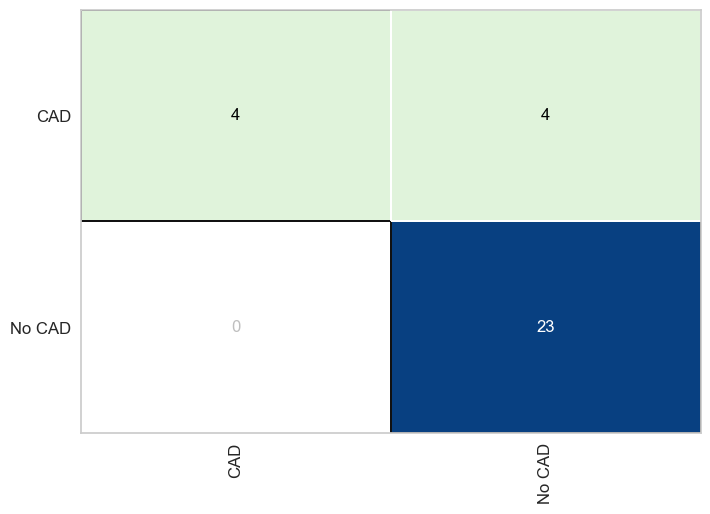

In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=4)

predict(ada)

Predictions: [0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


Training Score: 1.0


Confusion Matrix:
[[ 5  1]
 [ 3 22]]


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.96      0.88      0.92        25

    accuracy                           0.87        31
   macro avg       0.79      0.86      0.82        31
weighted avg       0.89      0.87      0.88        31



Accuracy Score: 0.8709677419354839
Mean Squared Error: 0.12903225806451613


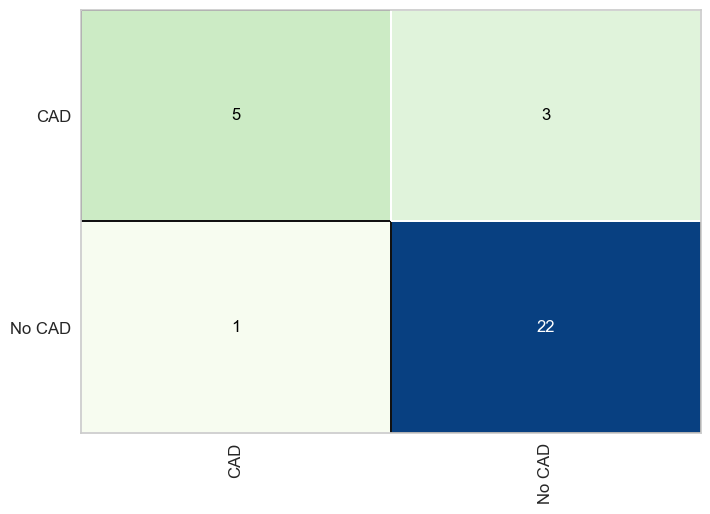

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=15, random_state=0,max_features="log2")
predict(etc)

Predictions: [0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1]


Training Score: 1.0


Confusion Matrix:
[[ 5  0]
 [ 3 23]]


Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.88      0.94        26

    accuracy                           0.90        31
   macro avg       0.81      0.94      0.85        31
weighted avg       0.94      0.90      0.91        31



Accuracy Score: 0.9032258064516129
Mean Squared Error: 0.0967741935483871


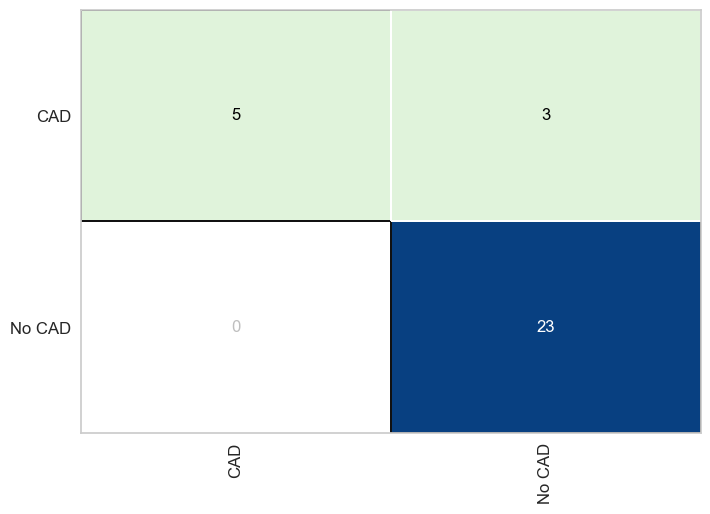

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=5)
predict(gbc)

Predictions: [1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1]


Training Score: 1.0


Confusion Matrix:
[[ 4  3]
 [ 4 20]]


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.87      0.83      0.85        24

    accuracy                           0.77        31
   macro avg       0.68      0.70      0.69        31
weighted avg       0.79      0.77      0.78        31



Accuracy Score: 0.7741935483870968
Mean Squared Error: 0.22580645161290322


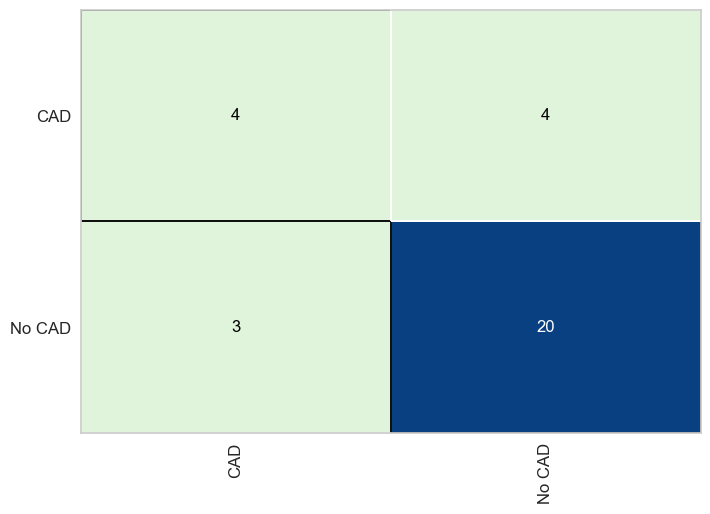

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state = 2)
predict(dtc)

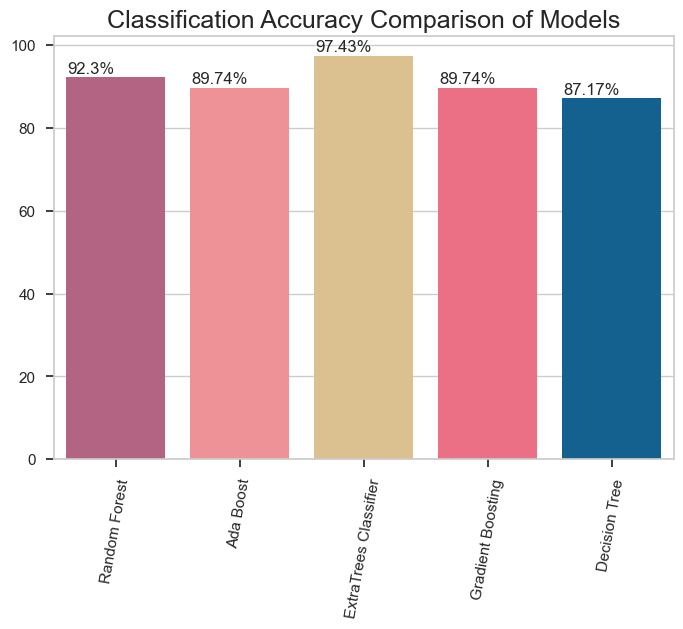

In [29]:
models_name=["Random Forest","Ada Boost","ExtraTrees Classifier","Gradient Boosting","Decision Tree"]
score=[92.3,89.74,97.43,89.74,87.17]
sns.set(context='notebook', style=None)
ax = sns.barplot(x=models_name, y=score, palette=['#C05780','#FF828B','#E7C582','#FF5C77','#0065A2'])
ax.set_title('Classification Accuracy Comparison of Models', fontsize=18)
for item in ax.get_xticklabels():
    item.set_rotation(80)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+1))

In [30]:
model_etc=ExtraTreesClassifier(n_estimators=15, random_state=0,max_features="log2")

In [31]:
model_etc.fit(X_train,y_train)

ExtraTreesClassifier(max_features='log2', n_estimators=15, random_state=0)

In [32]:
#making a predictive system
input_data=(48,0,130,0,0,1,0,83,93,20,9000,35,279,55,0)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data=scaler.transform(input_data_reshaped)

prediction=model_etc.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print("The person has no Coronary Heart Disease")
else:
    print("The person has Coronary Heart Disease.")

[0]
The person has no Coronary Heart Disease


In [33]:
#making a predictive system
input_data=(67,0,140,1,0,0,1,80,309,26,7700,38,165,40,4)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data=scaler.transform(input_data_reshaped)

prediction=model_etc.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print("The person has no Coronary Heart Disease")
else:
    print("The person has Coronary Heart Disease.")

[1]
The person has Coronary Heart Disease.
